<a href="https://colab.research.google.com/github/ridvanyigit/py-data-analysis-crash-codes/blob/main/Pandas_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importing Libraries and Generating Initial Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
from numpy.random import randn, randint, uniform, sample

df = pd.DataFrame(randn(1000), index=pd.date_range('1/1/2025', periods=1000), columns=['value'])
ts = pd.Series(randn(1000), index=pd.date_range('1/1/2025', periods=1000))

## 2. Cumulative Sum and Data Exploration

In [11]:
df['value'] = df['value'].cumsum()
df.head()

,value
2025-01-01,-0.182993
2025-01-02,0.078306
2025-01-03,1.527336
2025-01-04,1.816925
2025-01-05,2.043818


In [12]:
ts = ts.cumsum()
ts.head()

,0
2025-01-01,-0.664954
2025-01-02,-0.694044
2025-01-03,-1.547731
2025-01-04,-2.972691
2025-01-05,-4.141877


In [13]:
type(df), type(ts)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

## 3. Basic Time Series Plotting with Pandas and Matplotlib

Python `plot()`

<Axes: >

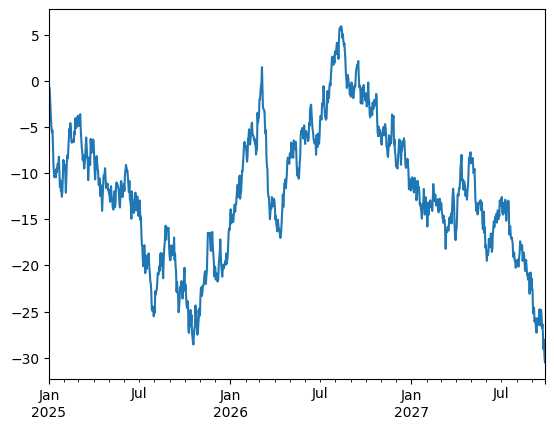

In [14]:
ts.plot()

Matplotlib `plt.plot()`

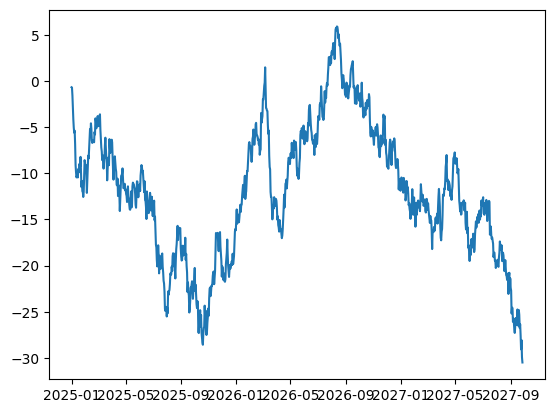

In [16]:
plt.plot(ts)

## 4. Loading Iris Dataset and Customizing Plots

In [17]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0, 0.5, 'Y Axis')

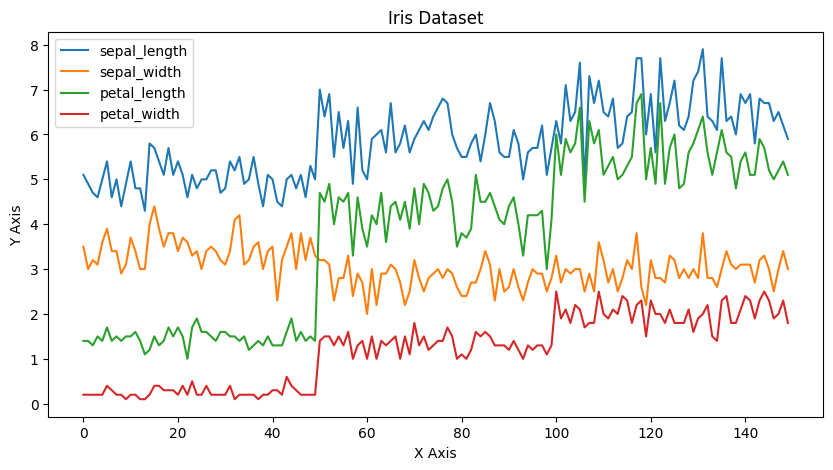

In [18]:
ax = iris.plot(figsize=(10,5), title='Iris Dataset')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')

## 5. Bar Plots

In [19]:
df = iris.drop('species', axis=1) #'species' == object format
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<Axes: >

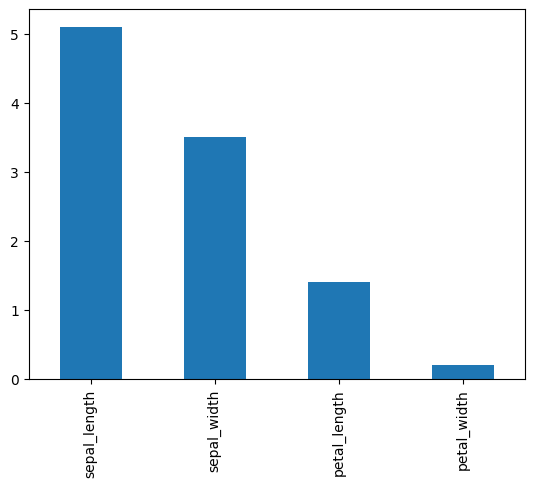

In [20]:
df.iloc[0].plot.bar()

## 6. Histograms

<Axes: ylabel='Frequency'>

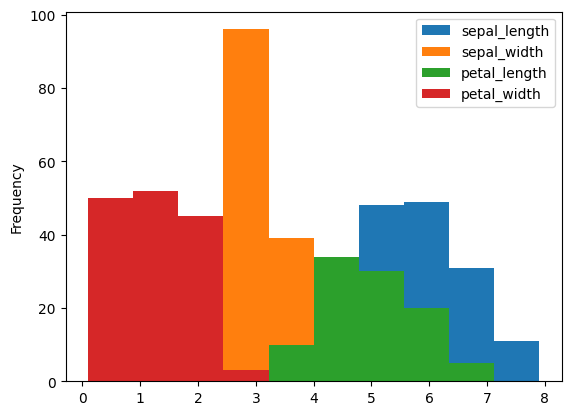

In [21]:
iris.plot.hist()

<Axes: ylabel='Frequency'>

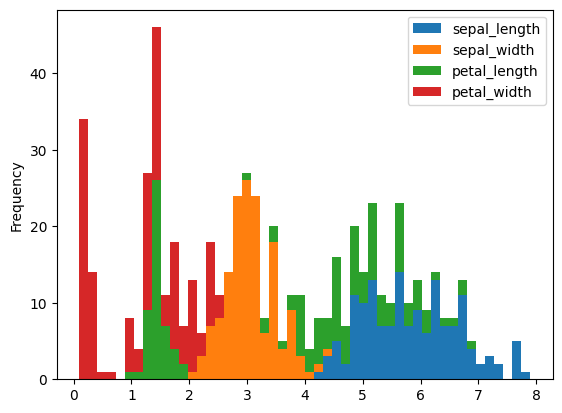

In [22]:
iris.plot.hist(bins=50, stacked=True)

<Axes: xlabel='Frequency'>

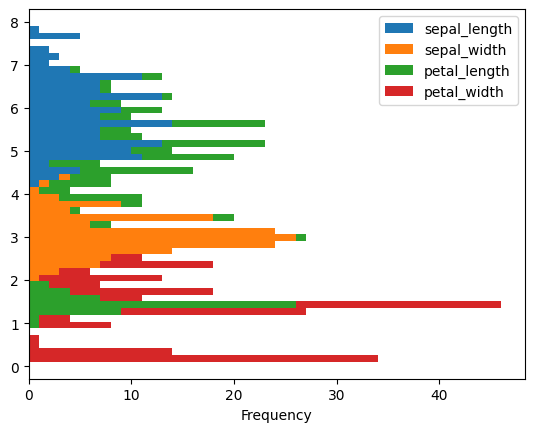

In [23]:
iris.plot.hist(bins=50, stacked=True, orientation='horizontal')

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

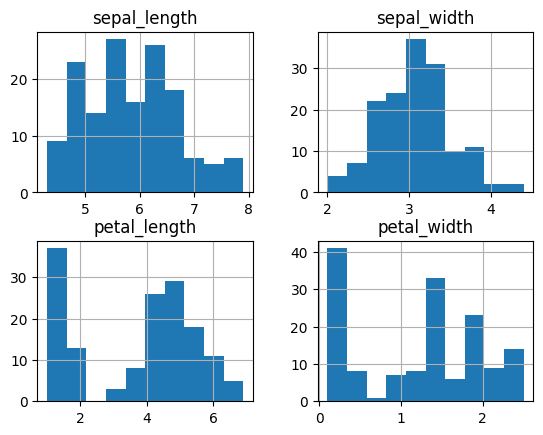

In [24]:
iris.hist()

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

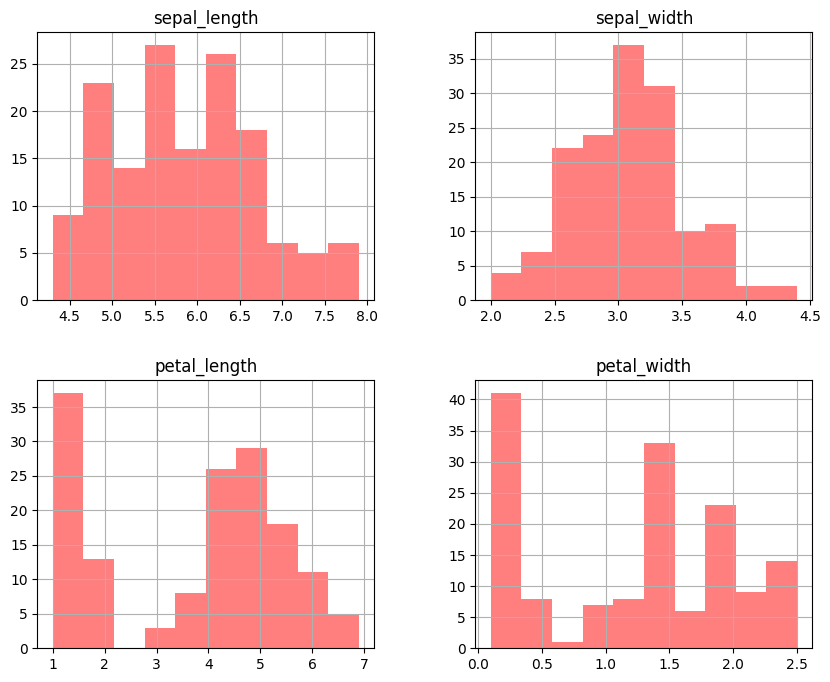

In [25]:
iris.hist(figsize=(10,8), color='r', alpha=0.5)

## 7. Box Plots

In [26]:
color = {
    'boxes': 'DarkGreen',
    'whiskers': 'r'
    }
color

{'boxes': 'DarkGreen', 'whiskers': 'r'}

<Axes: >

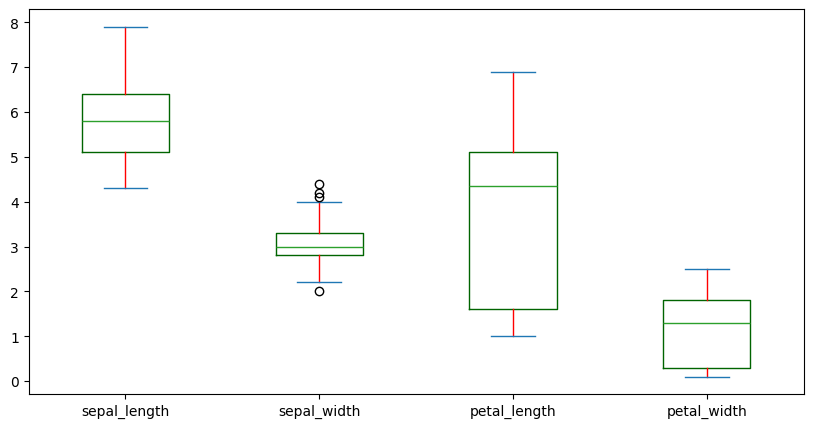

In [27]:
df.plot.box(figsize=(10,5), color=color)

<Axes: >

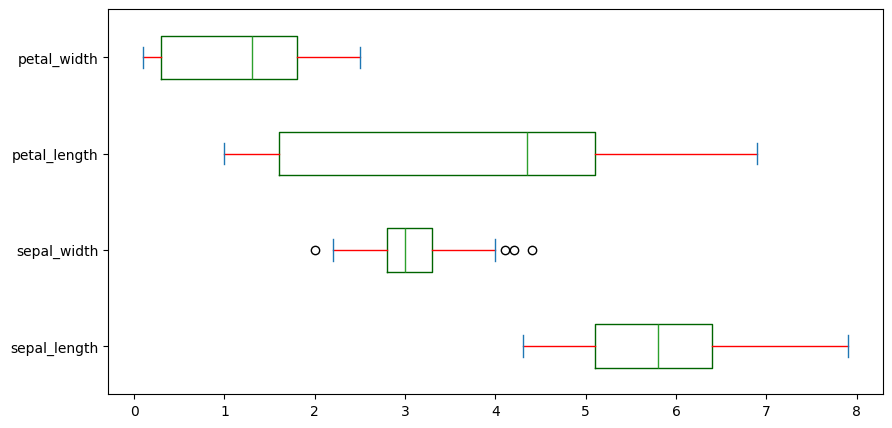

In [28]:
df.plot.box(figsize=(10,5), color=color, vert=False)

## 8. Area Plots

<Axes: >

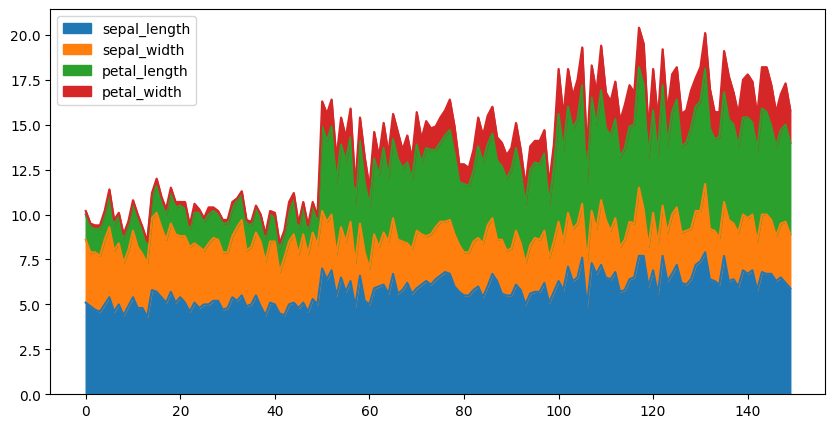

In [29]:
df.plot.area(figsize=(10,5))

<Axes: >

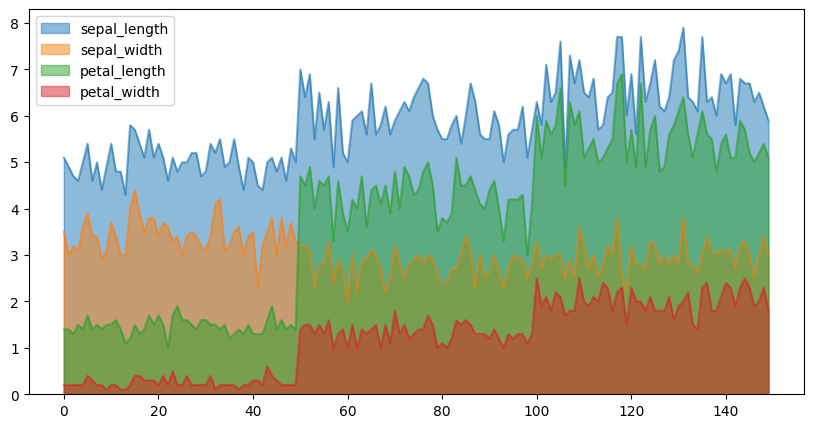

In [30]:
df.plot.area(figsize=(10,5), stacked=False)

## 9. Scatter Plots

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

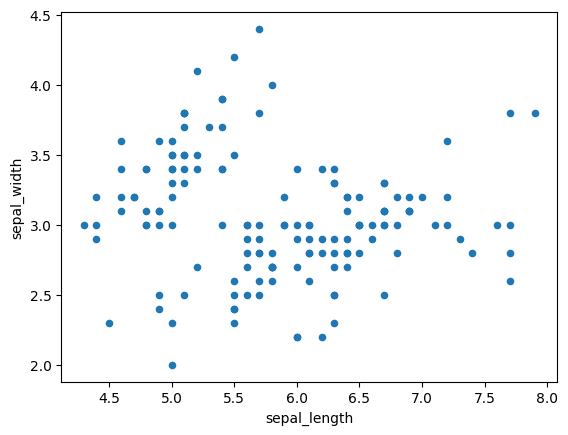

In [31]:
df.plot.scatter(x='sepal_length', y='sepal_width')

<Axes: xlabel='sepal_length', ylabel='petal_length'>

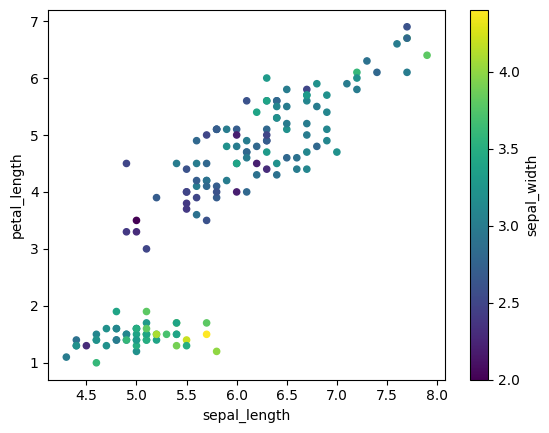

In [32]:
df.plot.scatter(x='sepal_length', y='petal_length', c='sepal_width')

<Axes: xlabel='sepal_width', ylabel='petal_width'>

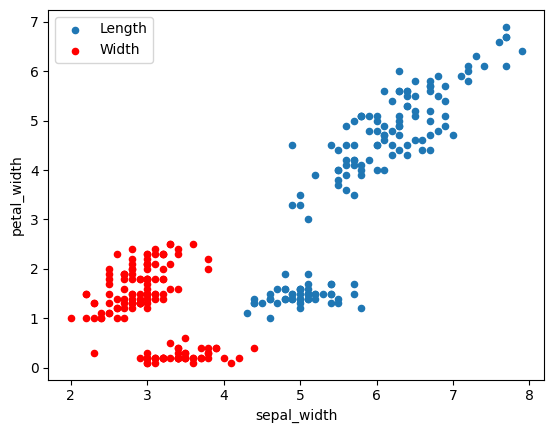

In [33]:
ax = df.plot.scatter(x='sepal_length', y='petal_length', label='Length')
df.plot.scatter(x='sepal_width', y='petal_width', label='Width', color='r', ax=ax)

<Axes: xlabel='sepal_length', ylabel='petal_length'>

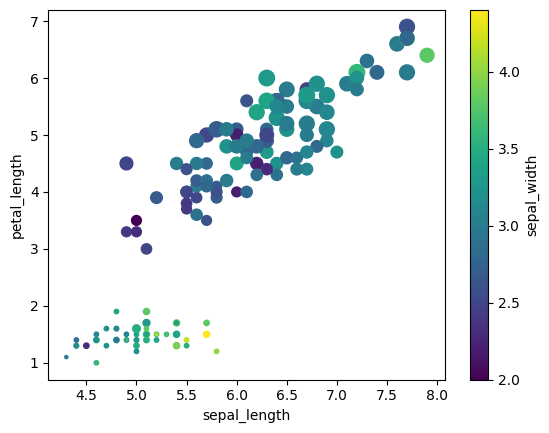

In [34]:
df.plot.scatter(x='sepal_length', y='petal_length', c='sepal_width', s=df['petal_width']*50)

## 10. Hexbin Plots

<Axes: xlabel='sepal_length', ylabel='petal_length'>

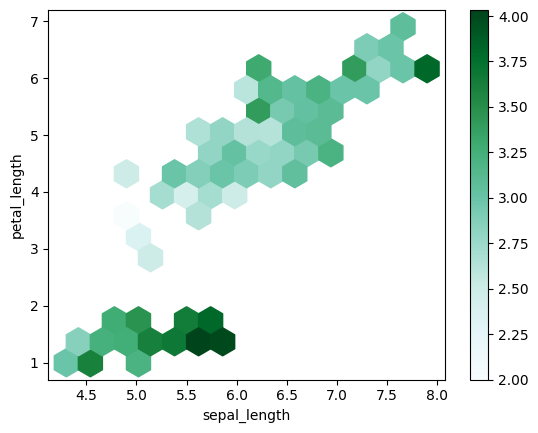

In [35]:
df.plot.hexbin(x='sepal_length', y='petal_length', gridsize=15, C= 'sepal_width')

## 11. Pie Charts

In [36]:
d = df.iloc[0]
d

,0
sepal_length,5.1
sepal_width,3.5
petal_length,1.4
petal_width,0.2


<Axes: ylabel='0'>

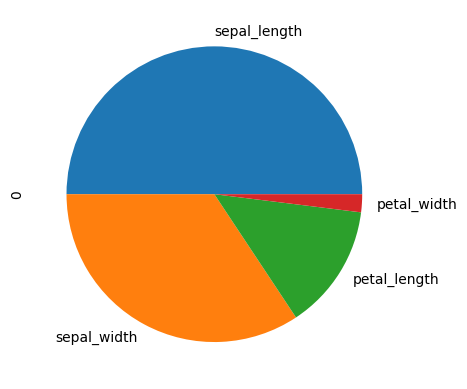

In [37]:
d.plot.pie()

In [38]:
d = df.head(1).T
d

,0
sepal_length,5.1
sepal_width,3.5
petal_length,1.4
petal_width,0.2


array([<Axes: ylabel='0'>], dtype=object)

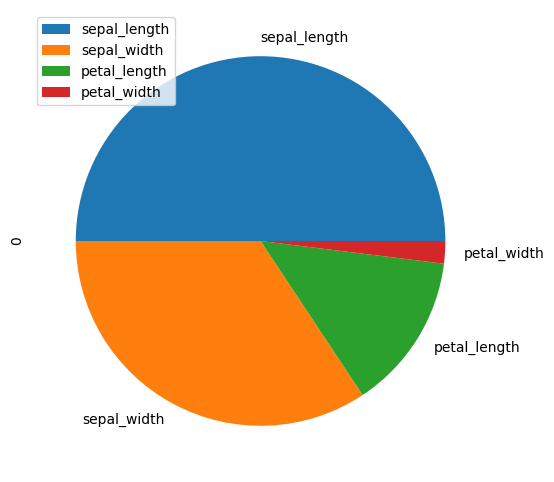

In [39]:
d.plot.pie(subplots=True, figsize=(6,6))

array([<Axes: ylabel='0'>, <Axes: ylabel='1'>], dtype=object)

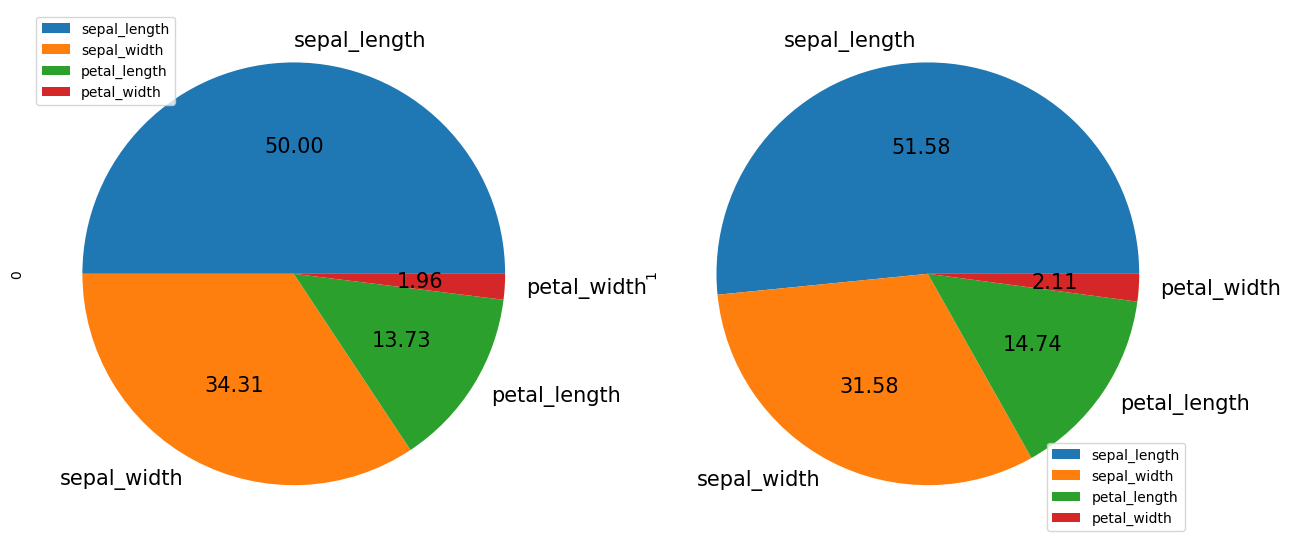

In [40]:
d = df.head(2).T
d.plot.pie(subplots=True, figsize=(15,15), autopct='%.2f', fontsize=15)

<Axes: ylabel='Pie Plot'>

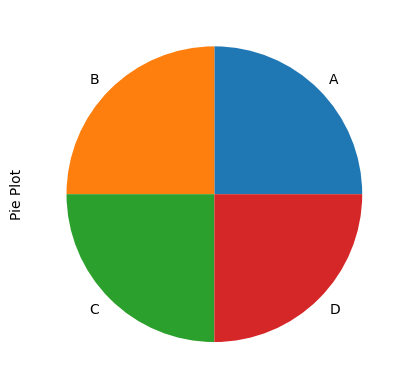

In [41]:
series = pd.Series([0.2]*4, index=['A','B','C','D'], name='Pie Plot')
series.plot.pie()

## 12. Scatter Matrix and KDE Plots

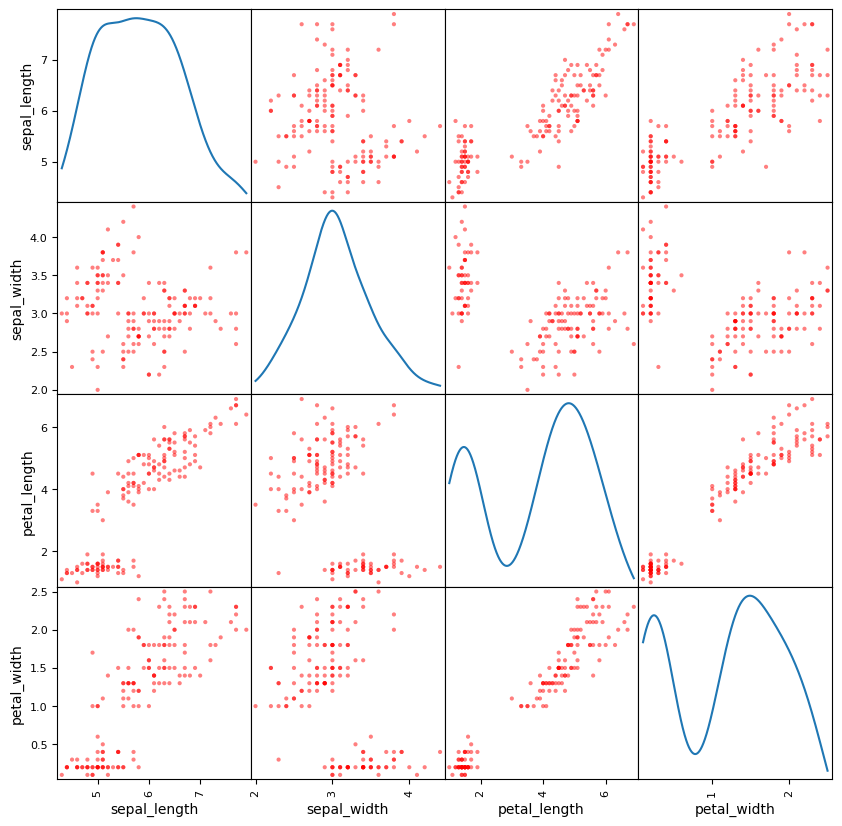

In [42]:
from pandas.plotting import scatter_matrix

scatter_matrix(df,figsize=(10,10), diagonal='kde', color='r')
plt.show()

<Axes: ylabel='Density'>

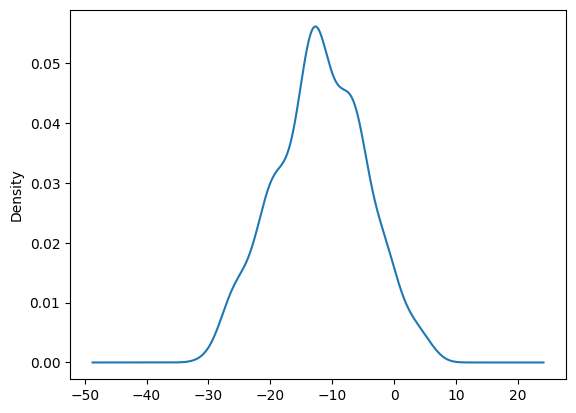

In [43]:
ts.plot.kde()

## 13. Andrews Curves

<Axes: >

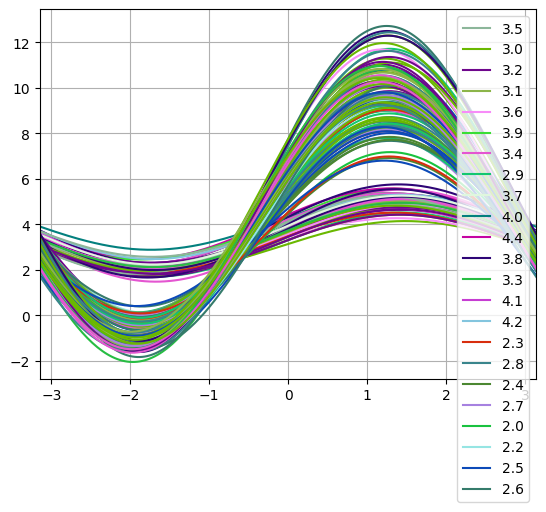

In [44]:
from pandas.plotting import andrews_curves

andrews_curves(df, 'sepal_width')

## 14. Advanced Plotting Techniques

<Axes: >

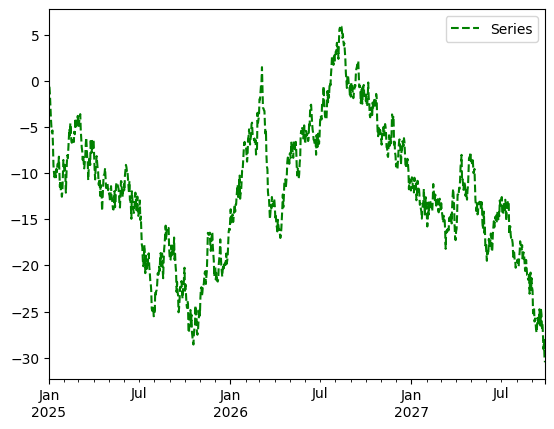

In [45]:
ts.plot(style='g--', label='Series', legend=True)

In [46]:
x = df.drop(['sepal_width','petal_width'], axis=1)
x.head()

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [47]:
y = df.drop(['sepal_length','petal_length'], axis=1)
y.head()

,sepal_width,petal_width
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2


<Axes: >

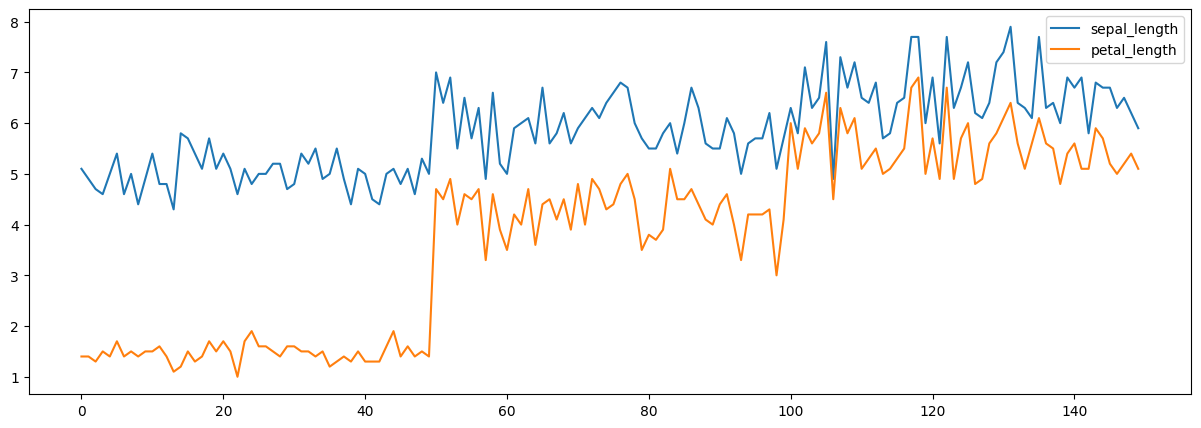

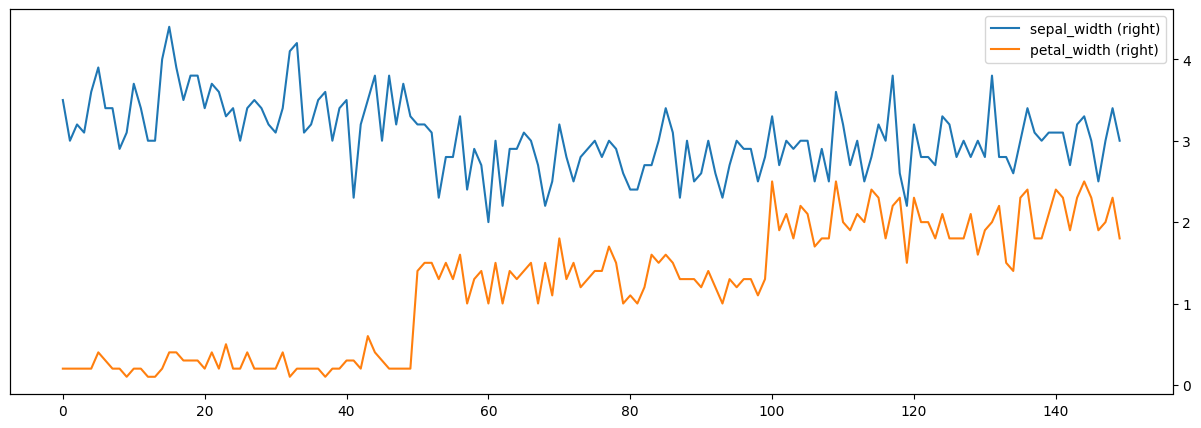

In [48]:
x.plot(figsize=(15,5))
y.plot(figsize=(15,5), secondary_y=True)

<Axes: >

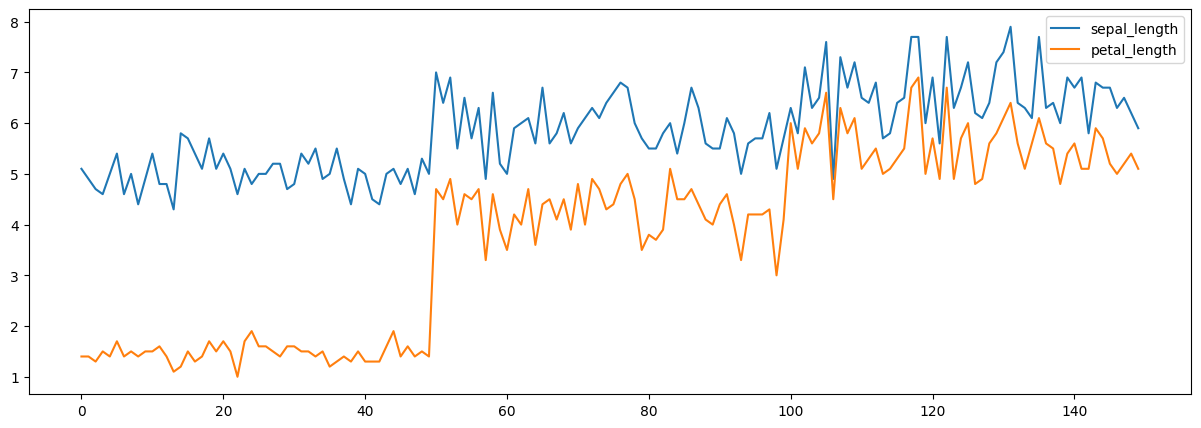

In [49]:
x.plot(figsize=(15,5), x_compat=True)

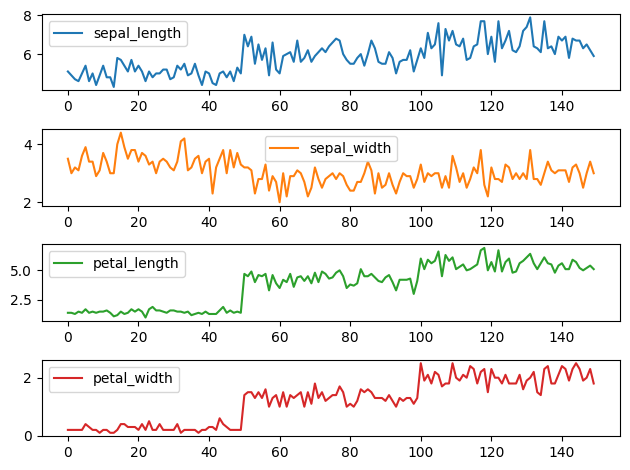

In [50]:
df.plot(subplots=True, sharex=False)
plt.tight_layout()

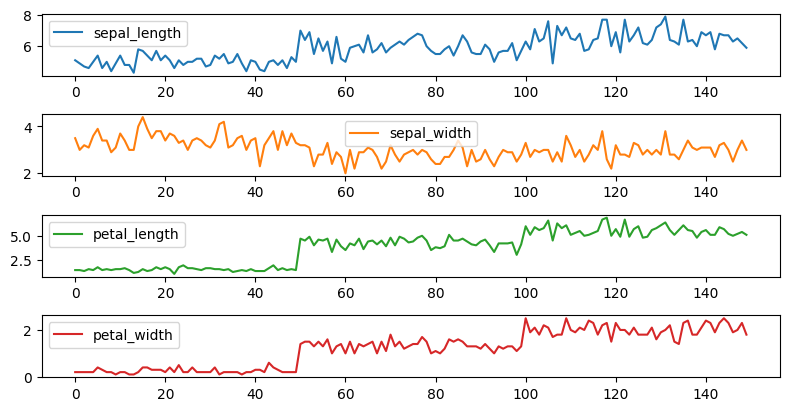

In [51]:
df.plot(subplots=True, sharex=False, layout=(8,1), figsize=(8,8))
plt.tight_layout()

## 15. Difference and Histogram Plots

In [52]:
df.diff()

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,NaN,NaN,NaN
1,-0.2,-0.5,0.0,0.0
2,-0.2,0.2,-0.1,0.0
3,-0.1,-0.1,0.2,0.0
4,0.4,0.5,-0.1,0.0
...,...,...,...,...
145,0.0,-0.3,-0.5,-0.2
146,-0.4,-0.5,-0.2,-0.4
147,0.2,0.5,0.2,0.1
148,-0.3,0.4,0.2,0.3


<Axes: ylabel='Frequency'>

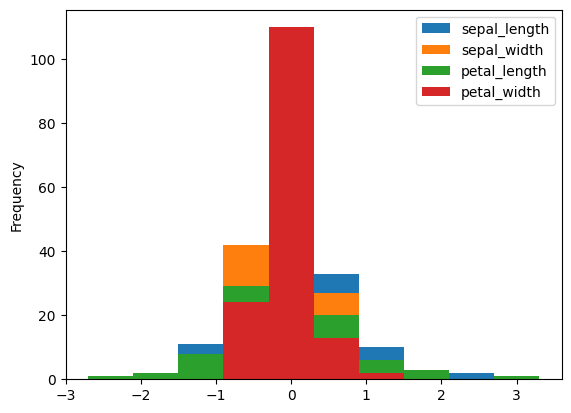

In [53]:
df.diff().plot.hist()

<Axes: ylabel='Frequency'>

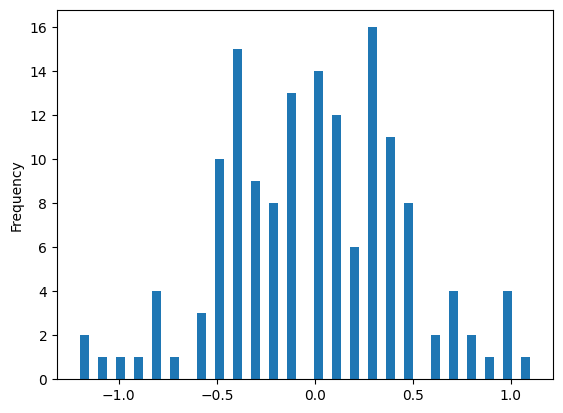

In [54]:
iris['sepal_width'].diff().plot.hist(bins=50)

## 16. Loading Titanic Dataset and Plotting

In [55]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: ylabel='Frequency'>

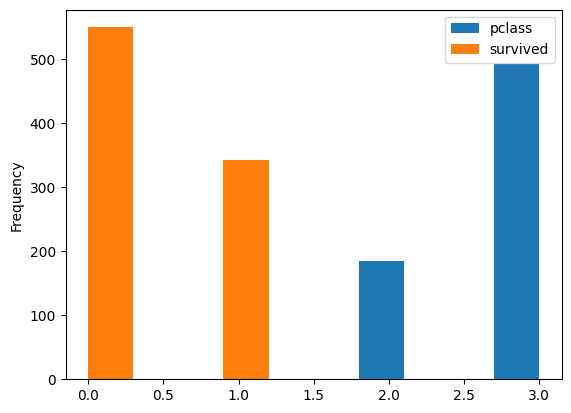

In [56]:
titanic[['pclass', 'survived']].plot.hist()

## 17. Bar Plots with Custom DataFrames

In [57]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.head()

,a,b,c,d
0,0.397218,0.111815,0.710051,0.154924
1,0.304858,0.412696,0.363831,0.964176
2,0.332918,0.351311,0.720069,0.092975
3,0.035278,0.443991,0.830197,0.251507
4,0.673805,0.830500,0.149915,0.336996


<Axes: >

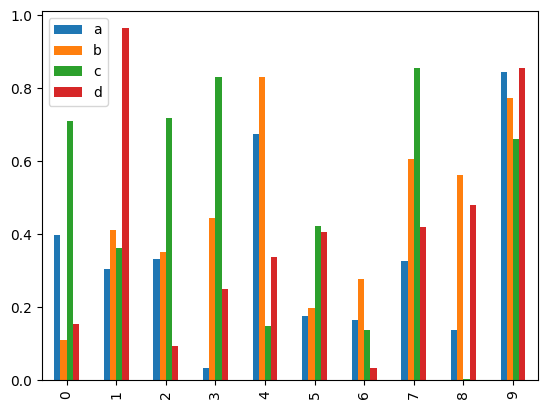

In [58]:
df.plot.bar()

<Axes: >

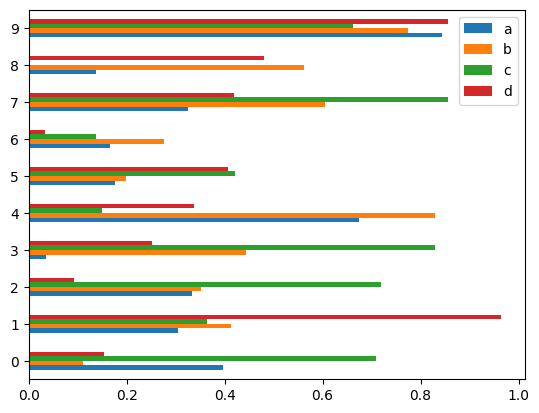

In [59]:
df.plot.barh()